# COSE474-2024F: Deep Learning HW1

### 2022320017 Youjin Kim
<i>** Discussions & exercises are at the bottom of each chapter</i>

# 2. Preliminaries

## <i>2.1. Data Manipulation<i>

### 2.1.1. Getting Started

In [77]:
import torch

In [78]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [79]:
x.numel()

12

In [80]:
x.shape

torch.Size([12])

In [81]:
X = x.reshape(3,4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [82]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [83]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [84]:
torch.randn(3,4)

tensor([[-1.0557,  0.8418,  0.4618, -0.8704],
        [ 0.7211, -1.4905, -0.5259, -0.9298],
        [ 0.7455, -0.0146,  0.8335, -0.4199]])

In [85]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 2.1.2. Indexing and Slicing

In [86]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [87]:
X[1,2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [88]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 2.1.3. Operations

In [89]:
# example of unary scalar operators (taking one input)
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [90]:
# example of binary scalar operators (taking a pair of inputs)
# inputs should be the same shape
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2,2,2,2])
x+y, x-y, x*y, x/y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [91]:
# concatenating multiple tensors
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X,Y), dim=0), torch.cat((X,Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [92]:
# binary tensor via logical statements
X==Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [93]:
# summing all elemtents in the tensor
X.sum()

tensor(66.)

### 2.1.4. Broadcasting

In [94]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [95]:
# a(3x1) and b(1x2) have different shape
# broadcasting produces a larger 3x2 matrix by replicating 'a' along the columns and 'b' along the rows before adding elementwise
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 2.1.5. Saving Memory

In [96]:
before = id(Y)
Y = Y+X # id(Y) changes because we dereference original Y and instead point Y at newly allocated memory
id(Y) == before

False

In [97]:
# in-place operations : assign result of an operation to a previously allocated array Y by using lsice notation
Z = torch.zeros_like(Y)
print('id(Z):',id(Z))
Z[:] = X+Y
print('id(Z):',id(Z))

id(Z): 6066767328
id(Z): 6066767328


In [98]:
before = id(X)
X += Y # or X[:] = X+Y
id(X) ==before

True

### 2.1.6. Conversion of Other Python Objects

In [99]:
A = X.numpy() # converting torch to numpy
B = torch.from_numpy(A) # converting NumPy to torch
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [100]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a) # converting a size-1 tensor to scalar

(tensor([3.5000]), 3.5, 3.5, 3)

### 2.1.7. Summary

### 2.1.8. Exercises

In [101]:
X, Y, X==Y, X<Y, X>Y

(tensor([[ 2.,  3.,  8.,  9.],
         [ 9., 12., 15., 18.],
         [20., 21., 22., 23.]]),
 tensor([[ 2.,  2.,  6.,  6.],
         [ 5.,  7.,  9., 11.],
         [12., 12., 12., 12.]]),
 tensor([[ True, False, False, False],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[False,  True,  True,  True],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]))

In [102]:
a = torch.arange(4).reshape((4,1))
b = torch.arange(3).reshape((1,3))
a+b, a-b, a*b, a/b, a**b

(tensor([[0, 1, 2],
         [1, 2, 3],
         [2, 3, 4],
         [3, 4, 5]]),
 tensor([[ 0, -1, -2],
         [ 1,  0, -1],
         [ 2,  1,  0],
         [ 3,  2,  1]]),
 tensor([[0, 0, 0],
         [0, 1, 2],
         [0, 2, 4],
         [0, 3, 6]]),
 tensor([[   nan, 0.0000, 0.0000],
         [   inf, 1.0000, 0.5000],
         [   inf, 2.0000, 1.0000],
         [   inf, 3.0000, 1.5000]]),
 tensor([[1, 0, 0],
         [1, 1, 1],
         [1, 2, 4],
         [1, 3, 9]]))

## <i>2.2. Data Preprocessing<i>

### 2.2.1. Reading the Dataset

In [103]:
import os

os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [104]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)


   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


### 2.2.2. Data Preparation

In [105]:
## Separating out columns corresponding to input verses target values
# we can select columns either by name or via integer-location based indexing(iloc)

## Handling missing values
# imputation : replaces missing values w/ estimates
# deletion : discards either rows/columns w/ missing values

# imputation technique(1) : treating NaN as a category
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [106]:
# imputation technique(2) : replace NaN entries w/ mean value of the column
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


### 2.2.3. Conversion to the Tensor Format

In [107]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

### 2.2.5. Exercises

In [108]:
#1. Loaded datasets. No missing values. All attributes except 'sex' is numerical
abalone_data = pd.read_csv("./data/abalone.data", 
                           names = [
                               "sex", "length", "diameter", "height", 
                               "whole_weight", "shucked_weight",
                               "viscera_weight", "shell_weight",
                               "rings"
                           ]
                          )
print(abalone_data)

     sex  length  diameter  height  whole_weight  shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      viscera_weight  shell_weight  rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [109]:
#2. selecting columns by name
abalone_data[["sex", "length", "height"]][:10]

,sex,length,height
0,M,0.455,0.095
1,M,0.350,0.090
2,F,0.530,0.135
3,M,0.440,0.125
4,I,0.330,0.080
5,I,0.425,0.095
6,F,0.530,0.150
7,F,0.545,0.125
8,M,0.475,0.125
9,F,0.550,0.150


In [110]:
#3. Depends on RAM. If the dataset if too large, it cannot be handled at once, so we need to decompose it to smaller datasets. 

#4. For large categories, we can reduce them based on the similarities of each category. 

#5.  pandas / NumPy, Pillow, ...

## <i>2.3. Linear Algebra</i>

### 2.3.1. Scalars

In [111]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x+y, x*y, x/y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2. Vectors

In [112]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [113]:
x[2]

tensor(2)

In [114]:
len(x)

3

In [115]:
x.shape

torch.Size([3])

### 2.3.3. Matrices

In [116]:
A = torch.arange(6).reshape(3,2)
A


tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [117]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [118]:
A = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4. Tensors

In [119]:
torch.arange(24).reshape(2,3,4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5. Basic Properties of Tensors Arithmetic

In [120]:
A = torch.arange(6, dtype=torch.float32).reshape(2,3)
B = A.clone()
A, A+B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [121]:
A*B # elementwise product

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [122]:
a = 2
X = torch.arange(24).reshape(2,3,4)
a+X, (a*X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 2.3.6. Reduction

In [123]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [124]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [125]:
A.shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [126]:
A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [127]:
A.sum(axis=[0,1]) == A.sum() # same as A.sum()

tensor(True)

In [128]:
A.mean(), A.sum()/A.numel()

(tensor(2.5000), tensor(2.5000))

In [129]:
A.mean(axis=0), A.sum(axis=0)/A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

### 2.3.7. Non-Reduction Sum

In [130]:
# keepdims=True : keep # of axes unchanged when invoking function
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [131]:
# create a matrix where each row sums up to 1
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [132]:
# calculate the cumulative sum of elements of A along the axis
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

### 2.3.8. Dot Products

In [133]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [134]:
torch.sum(x*y) # same as dot product

tensor(3.)

### 2.3.9. Matrix-Vector Products

In [135]:
print(A, A.shape)
print(x, x.shape)
print(torch.mv(A,x))
print(A@x)

tensor([[0., 1., 2.],
        [3., 4., 5.]]) torch.Size([2, 3])
tensor([0., 1., 2.]) torch.Size([3])
tensor([ 5., 14.])
tensor([ 5., 14.])


### 2.3.10. Matrix-Matrix Multiplication

In [136]:
B = torch.ones(3,4)
print(torch.mm(A,B))
print(A@B)

tensor([[ 3.,  3.,  3.,  3.],
        [12., 12., 12., 12.]])
tensor([[ 3.,  3.,  3.,  3.],
        [12., 12., 12., 12.]])


### 2.3.11. Norms

In [137]:
# L2 norm
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [138]:
# L1 norm (manhattan distance)
torch.abs(u).sum()

tensor(7.)

In [139]:
# Frobenius norm
torch.norm(torch.ones((4,9)))

tensor(6.)

## <i>2.5. Automatic Differentiation<i>

### 2.5.1. A Simple Function

In [186]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [187]:
x.requires_grad_(True) # equal to x = torch.arange(4.0, requires_grad=True)
x.grad # gradient is none by default

In [188]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [189]:
# take gradient of y w.r.t. x by calling its backward method
# we can access the gradient via x's grad attribute
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [190]:
x.grad == 4*x

tensor([True, True, True, True])

In [191]:
x.grad.zero_() # reset the gradient buffer

# define another function & take its gradient
y = x.sum() 
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.2. Backward for Non-Scalar Variables ***

In [192]:
x.grad.zero_()

y = x * x
y.backward(gradient=torch.ones(len(y))) # Faster : y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 2.5.3. Detaching Computation

In [193]:
# we want to focus on the direct influence of x on z, rather than the influence conveyd via y.
x.grad.zero_()
y = x * x
u = y.detach() # takes the same value as y but its provenance has been wiped out
z = u * x 

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [194]:
x.grad.zero_()
y.sum().backward() # we can still calculate gradient y w.r.t. x because computational graph leading to y persists
x.grad == 2 * x

tensor([True, True, True, True])

### 2.5.4. Gradients and Python Control FLow

In [198]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [199]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [200]:
a.grad == d / a

tensor(True)

## <i>2.6. Discussion


<u>In the last code of section 2.5.4, why is a.grad == d/a?</u>

Function f(a) simply outputs various multiples of a. 
    * b = 2^n * a (n is an integer)
    * c = b or 100*b
    * Therefore, d is a scalar multiplication of a.
Since d is a scalar multiplication of a, its gradient becomes a scalar. 
d.backward() calculates the gradient of d w.r.t. a and stores it in a.grad. Therefore, a.grad is logically equal to d/a.

***
# 3. Linear Neural Networks for Regression

## 3.1. <i>Linear Regression<i>

In [1]:
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

### 3.1.1. Basics

Given features of a training dataset X and corresponding(=known) labels y, the goal of linear regression is to find the weight vector w and the bias term b such that, 
given features of a new data example sampled from the same distribution as X, the new example's label will (in expectation) be predicted with the smallest error.

For searching the best model parameters w and b, we need 2 more things : 
(1) measure of the quality of some given model = Loss Function
(2) procedure for updating the model to improve its quality = Optimization Alg.


### 3.1.2. Vectorization for Speed

In [143]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [144]:
# using for-loop
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.05815 sec'

In [146]:
# using vectorization
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00124 sec'

### 3.1.3. The Normal Distribution and Squared Loss

In [147]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x-mu)**2 / sigma**2)

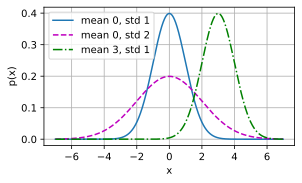

In [148]:
# use NumPy for visualization
x = np.arange(-7, 7, 0.01)

# mean and standard deviation pairs
params = [(0,1), (0,2), (3,1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], 
         xlabel='x', ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

### 3.1.4. Linear Regression as a Neural Network

We can think of linear regression as a single-layer fully connected network. 

### 3.1.6. Exercises

## <i>3.2. Object-Oriented Design for Implementation<i>

In [149]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 3.2.1. Utilities

In [158]:
def add_to_class(Class): #@save
    """Register functions as methods in created class."""
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [156]:
# we plan to implement a class A with a method do.
class A: #class A
    def __init__(self):
        self.b = 1

a = A() #instance a

In [157]:
@add_to_class(A) # decorate method do by add_to_class w/ class A as argument
def do(self):
    print('Class attribute "b" is', self.b)

a.do()

Class attribute "b" is 1


In [165]:
# utility class that saves all algruments in a class's __init__ method as class attributes
# this allows us to extend constructor call signatures implicitly w/o additional code
class HyperParameters: #@save
    """The base class of hyperparameters"""
    def save_hyperparameters(self, ignore=[]):
        raise NotImplemented

In [166]:
# call the fully-implemented HyperParameters class saved in d2l
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a=', self.a, 'self.b=', self.b)
        print('Thre is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a= 1 self.b= 2
Thre is no self.c = True


In [167]:
# this allows us to plot experiment progress interactively while it is going on
class ProgressBoard(d2l.HyperParameters): #@save
    """The board that plots data points in animation"""
    def __init__(self, xlabel=None, ylabel=None, xlim=None, ylim=None,
                 xscale='linear', yscale='linear', 
                 ls=['-','--','-.',':'], colors=['C0','C1','C2','C3'],
                 fig=None, axes=None, figsize=(3.5,2.5), display=True):
        self.save_hyperparameters()
    def draw(self, x, y, label, every_n=1): # plots a point in the figure, with label specified in the legend
        raise NotImplemented

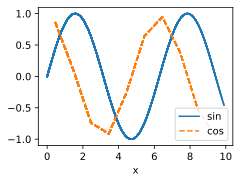

In [169]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=1)
    board.draw(x, np.cos(x), 'cos', every_n=10)

### 3.2.2. Models

In [173]:
# __init__ : stores learnable parameters
# training_step method : accepts a data batch to return the loss value
# configure_optimizers : retruns the optimization method used to updated the learnable parameters
# validation_step : report the evaluation meqsures

class Module(nn.Module, d2l.HyperParameters): #@save
    """The base class of models."""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError
    
    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural Network is defined'
        return self.net(X)
    
    def plot(self, key, value, train):
        """Plot a point in animation"""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel='epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plort_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key, 
                        every_n=int(n))
        
    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l
    
    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

### 3.2.3. Data

In [174]:
class DataModule(d2l.HyperParameters): #@save
    """The base class of data."""
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError
    
    def train_dataloader(self):
        return self.get_dataloader(train=True)
    
    def val_dataloader(self):
        return self.get_dataloader(train=False)

### 3.2.4. Training

In [175]:
class Trainer(d2l.HyperParameters): #@save
    """The base class for training models with data."""
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus==0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader) if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

## <i>3.4. Linear Regression Implementation from Scratch<i>

In [176]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 3.4.1. Defining the Model

In [177]:
class LinearRegressionScratch(d2l.Module): #@save
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True) # initialize weights by drawing random numbers from a normal distribution
        self.b = torch.zeros(1, requires_grad=True) # bias is 0

In [178]:
@d2l.add_to_class(LinearRegressionScratch) #@save
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

### 3.4.2. Defining the Loss Function

In [179]:
@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
    l = (y_hat - y)**2 / 2
    return l.mean() # avg of squared loss value among all examples in the minibatch

### 3.4.3. Defining the Optimization Algorithm

In [180]:
class SGD(d2l.HyperParameters): #@save
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self): # update parameters
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self): # sets all gradients to 0 (must run before a backpropagation step)
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [181]:
@d2l.add_to_class(LinearRegressionScratch) #@save
def configure_optimizers(self): # returns an instance of the SGD class
    return SGD([self.w, self.b], self.lr) 

### 3.4.4. Training

* in each epoch : iterate through the entire training dataset & pass once through ever example
* in each iteration : grap a minibatch of training examples & compute its loss through the model's training_step method
* compute the gradients w.r.t. each parameter
* call the optimization algorithm to update the model parameters

In [182]:
@d2l.add_to_class(d2l.Trainer) #@save
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer) #@save
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

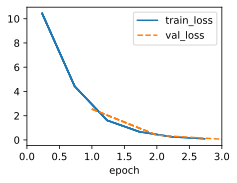

In [183]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]),b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [184]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.1149, -0.1927])
error in estimating b: tensor([0.2631])


## <i>3.5. Discussion</i>
    

<u>What are the differences between gradient descent, stochastic gradient descent and minibatch stochastic gradient descent algorithm? Discuss each algorithm and compare their advantages/disadvantages.</u>

GD, SGD, Mini-batch SGD are all optimization algorithms used to minimize a loss function by updating model parameters. They differ in how much of the training data is used to compute the gradient during each update step.

1. Gradient Descent [GD]
    * computes the gradient of the loss function using the <b>entire training dataset</b>. also called 'batch' gradient descent [BGD]
    * advantages : provides a precise & stable gradient b/c it uses all data
    * disadvantages : SLOW(in each step) for large datasets, requires a lot of memory

2. Stochastic Gradient Descent [SGD]
    * computes the gradient using <b>only one random data point(one sample)</b> from the training dataset at each update. introduces randomness into the parameter updates
    * advantages : requires less memory than full-batch. can escape local optima due to its noisy updates. FAST(in each step)
    * disadvantages : may take longer to converge (may never reach the exact optima due to its noise). b/o moving data from main memory to processor ache is slower than multiplication/addition, it can take a lot longer to process one sample at a time compared to a full batch.

3. Mini-batch Stochastic Gradient Descent [Mini-batch SGD]
    * computes the gradient using <b>a small subset(mini-batch)</b> of the training data at each update. The specific size of the mini-batch depends on many factors such as amt of memory, # of accelerators, layers, dataset size. 
    * advantages : more stable than SGD b/c averaging over a mini-batch reduces the noise in the gradient estimation. takes advantage of vectorized operations on GPUs. 
    * disadvantages : requires careful tuning of the batch size. requires more memory than SGD

***
# 4. Linear Neural Networks for Classification

## <i>4.1. Softmax Regression

### 4.1.1. Classification

Simple image classification problem
* input : 2x2 grayscale image -> 4 features (1 pixel = 1 scalar)
* output : label (cat, chicken, dog)

<i>One-hot encoding</i> : simple way to represent categorical data!
* cat = (1,0,0)
* chicken = (0,1,0)
* dog =  (0,0,1)

Since we have 4 features and 3 possible output categories, we need 12 scalars to represent the weights (w w/ subscripts) and 3 scalars to represent the biases (b w/ subscripts). 

Softmax : transform output values so that they are nonnegative and  add up to 1


### 4.1.2. Loss Function

Now that we learned a mapping from features x to probabilities y_hat, we ened a way to optimize the accuracy of this mapping.

The vector y_hat returned by softmax can be interpreted as the extimated conditional probabilities of each class, given any input x. Since maximizing the product of terms is awkward, we take the negative logarithm to obtain the equivalent problem of minimizing the negative log-likelihood. 
-> Cross-Entropy Loss


### 4.1.3. Information Theory Basics

<i>Information theory</i> deals w/ the problem of encoding, decoding, transmitting, and manipulating information(data)
* One of the fundamental theorems of information theory states that in order to encode data drawn randomly from the distribution, we need at least H[P] “nats” to encode it
* Easy to predict = easy to compress
* If we cannot perfectlly predict every event-> surprised. Our surprise is greater when an event is assigned lower probability.
* Entropy = level of surprise experienced by someone who knows the true probability. 
* Cross-entropy = expected surprisal of an observer w/ subject probabilities Q upon seeing data that was actually generated according to probabilities P.

Cross-entropy classification obejctive
* maximizing the likelihood of the observed data
* minimizing our surprisal required to communicate the labels



## <i>4.2. The Image Classification Dataset

In [201]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

### 4.2.1. Loading the Dataset

In [203]:
class FashionMNIST(d2l.DataModule): #@save
    """The Fashion-MNIST dataset"""
    def __init__(self, batch_size=64, resize=(28,28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)
        

In [204]:
# Fashion-MNIST : 10 class, 6000 img for each class in training dataset, 1000 img for each class in test dataset
data = FashionMNIST(resize=(32,32))
len(data.train), len(data.val)

100.0%


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



(60000, 10000)

In [208]:
# c, h, w = # of color channels, height, width
data.train[0][0].shape

torch.Size([1, 32, 32])

In [212]:
@d2l.add_to_class(FashionMNIST) #@save
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

### 4.2.2. Reading a Minibatch

In [218]:
# every iteration...
# a data iterator reads a minibatch of data w/ size batch_size
# randomly shuffle the examples from the training data iterator
@d2l.add_to_class(FashionMNIST) #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

In [211]:
# let's load a minibatch of images by invoking train_dataloader method
# it contains 64 images
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [213]:
tic = time.time()
for X,y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'2.63 sec'

### 4.2.3. Visualization

In [214]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5): #@save
    """Plot a list of images"""
    raise NotImplementedError

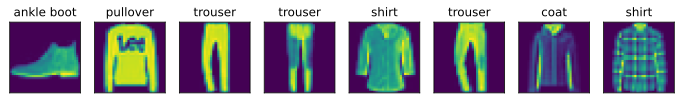

In [219]:
@d2l.add_to_class(FashionMNIST) #@save
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X,y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)

batch = next(iter(data.val_dataloader()))
data.visualize(batch)

## <i>4.3. The Base Classification Model

### 4.3.1. The Classifier Class

In [220]:
class Classifier(d2l.Module): #@save
    """The base class of classification models."""
    def validation_step(self, batch): # report loss value & classification accuracy on a validation batch
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1], train=False))
        self.plot('acc', self.accuracy(Y_hat, batch[-1], train=False))

In [221]:
# By default we use a stochastic gradient descent optimizer
@d2l.add_to_class(d2l.Module) #@save
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

### 4.3.2. Accuracy

In [224]:
@d2l.add_to_class(Classifier) #@save
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype) # obtain the predicted class by the idx for the largest entry in each row
    compare = (preds == Y.reshape(-1)).type(torch.float32) # compare predicted class w/ GT y elementwise
    return compare.mean() if averaged else compare # tensor containing entries of 0(false) and 1(true). taking the sum yields # of correct predictions

## <i>4.4. Softmax Regression Implementation from Scratch

### 4.4.1. The Softmax

In [226]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(axis=0, keepdims=True), X.sum(axis=1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [227]:
## computing softmax requires 3 steps :
# (1) exponentiation of each term
# (2) a sum over each row to compute the normalization constant for each example
# (3) division of each row by its normalization constant
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition # broadcasting mechinism applied here

In [228]:
X = torch.rand((2,5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1816, 0.2600, 0.1207, 0.2546, 0.1830],
         [0.2637, 0.1306, 0.2260, 0.2101, 0.1696]]),
 tensor([1.0000, 1.0000]))

### 4.4.2. The Model

In [230]:
# raw data : 28x28 pixel images
# output data : 10 classes -> dimension of 10

# softmax regression
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [231]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0])) # flatten 28x28 img into a vector
    return softmax(torch.matmul(X, self.W) + self.b)

### 4.4.3. The Cross-Entropy Loss

In [235]:
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0,1], y] 
# first element comes from row 0, col y[0] 
# second element comes from row 1, col y[1]

tensor([0.1000, 0.5000])

In [236]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [237]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

### 4.4.4. Training

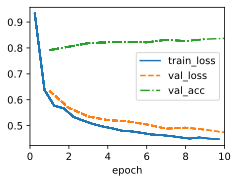

In [238]:
# use fit method to train the model w/ 10 epochs
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 4.4.5. Prediction

In [239]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

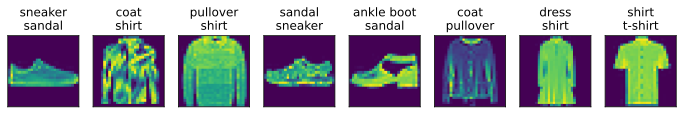

In [240]:
# we are more interested in the imgs we label "incorrectly"
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X,y], labels=labels)

## <i>4.5. Discussion

<u> What are the disadvantages of one-hot encoding? Compare with other encoding methods. When the number of output labels is large, which encoding method is appropriate?</u>

* High dimensionality : Since one-hot encoding creates a sparse vector with a dimension equal to the number of categories, the results can be very high-dimensional and sparse vectors if there are many categories. This can lead to increased memory usage and computational complexity.
* Compared to ordinal encoding which leverages the order of categories, one-hot encoding cannot capture any relationship between categories. Also, using target/mean encoding which replaces each category with the mean of the target variable, dimensionality can be reduced.

# 5. Multilayer Perceptrons

## <i>5.1. Multilayer Perceptrons</i>

### 5.1.1 Hidden Layers

Limitations of Linear Models
- Linearity in affine transformations is a **strong** assumption
- Monotinicity (any increase in feature must either always cause an increase/decrease in our model's output) : In reality, the output depends in complex ways on its context.
- Studies on nonlinearity
    - sequence of binary decisions in decision trees (Quinlan, 1993)
    - kernel methods(Aroszajn, 1950)
    ...

Incorporating Hidden Layers : MLP
- easiest way to overcome limitations of linear models : stacking many fully-connected layers on top of one another
- every input influences every neuron in the hidden layer, an each of these in turn influences every neuron in the output layers

From Linear to Nonlinear
- a nonlinear activation function $\sigma$ is applied to each hidden unit.

Universal Approximators
- even with a single-hidden-layer network, given enough nodes (possibly absurdly many), and the right set of weights, we can model any function
- However, just because a single-hidden-layer network can learn any function does not mean that you should try to solve all of your problems with one.
- In this case, kernel methods are way more effective, since they are capable of solving the problem exactly even in **infinite dimensional spaces** (Kimeldorf and Wahba, 1971, Schölkopf et al., 2001)
- We can approximate many functions much more compactly by using **deeper**(rather than wider) networks (Simonyan and Zisserman, 2014)

### 5.1.2. Activation Functions

$$\text{ReLU}(x)=\max(x,0)$$

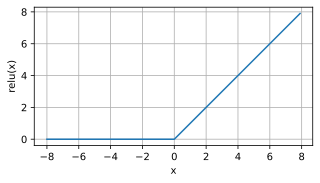

In [260]:
# ReLU : rectified linear unit
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

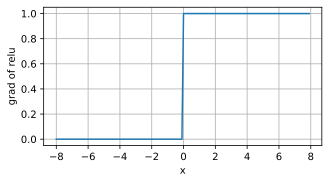

In [261]:
# gradient of ReLU : backpropagation
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5,2.5))


$$\text{sigmoid}(x) = \frac{1}{1+\exp(-x)}$$

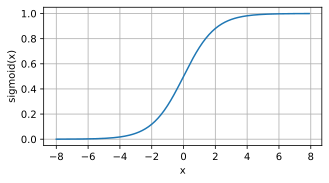

In [272]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5,2.5))

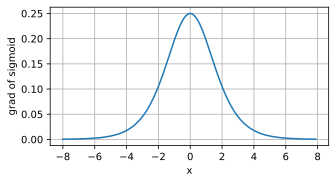

In [273]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5,2.5))

Largest gradient is 0.25 in sigmoid.  
If we have many layers, the value will get small as we multiply 0.25 several times, so we prefer ReLU more in this case.  
Gradient Vanishing Problem

$$\tanh(x) = \frac{1-\exp(-2x)}{1+\exp(-2x)}$$

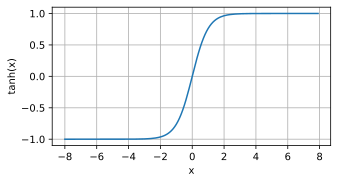

In [270]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5,2.5))

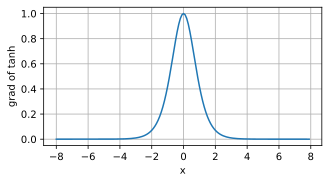

In [271]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5,2.5))

## <i>5.2. Implementation of Multilayer Perceptrons

In [280]:
import torch
from torch import nn
from d2l import torch as d2l

### 5.2.1. Implementation from Scratch

In [295]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        # allocate memory for the gradients of the loss w.r.t. parameters
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens)*sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs)*sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

In [290]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X,a)

In [299]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

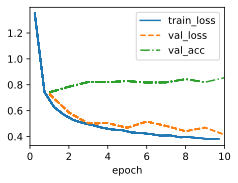

In [300]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 5.2.2. Concise Implementations

In [301]:
# Model
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens), 
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

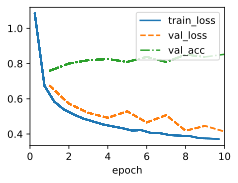

In [302]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model,data)

## <i>5.3. Forward Propagation, Backward Propagation and Computational Graphs</i>

**Forward propagation(forward pass)** : calculation and storage of intermediate variables (including outputs) for a NN in order from the input layer to the output layer.

**Backpropagation** : calculating the gradient of NN parameters.
- traverses the network in reverse order, from the output to the input layer, according to the <i>chain rule</i>
- stores any intermediate variables (partial derivatives) required while calculating the gradient w.r.t. some parameters

<br>
Whan training NN, forward and backward propagation depend on each other.  
For forward propagation, we traverse the computational graph in the direction of dependencies and compute all variables on its path. These are then used for backpropagation where the compute order on the graph is reversed. 

- Note that backpropagation reuses the stored intermediate values from forward propagation to avoid duplicate calculations.
- Besides, the size of such intermediate values is roughly proportional to the number of network layers and the batch size. Thus, training deeper networks using larger batch sizes more easily leads to out-of-memory errors.


## <i>5.4. Discussion&Exercises

### 5.1.2.1 (Exercise) My own exercise/experiment
implementing parameterized ReLU : 
$$\text{pReLU}(x) = \max(0,x) + \alpha \min(0,x).$$

In [268]:
# pReLU : adds a linear term to ReLU so that some info still gets through, even the argument is negative.
pReLU = lambda x, a: torch.max(torch.tensor(0), x) + a * torch.min(torch.tensor(0),x)

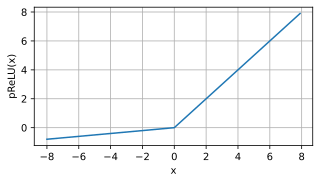

In [266]:
y = pReLU(x=x, a=0.1)
d2l.plot(x.detach(), y.detach(), 'x', 'pReLU(x)', figsize=(5,2.5))

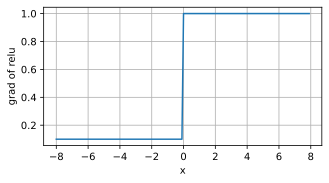

In [267]:
# gradient of pReLU
x.grad.data.zero_() # set gradient to 0 (이거 안넣으면 gradient 누적됨)
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5,2.5))


### 5.1.2.3. (Exercise)

Show that sigmoid and tanh are very similar
* $\tanh(x)+1 = \frac{1-\exp(-2x)}{1+\exp(-2x)} + 1 = \frac{2}{1+\exp(-2x)}$
* $2\text{sigmoid}(2x) = \frac{2}{1+\exp(-2x)}$

### 5.2.4 (Exercise)

Try adding a hidden layer to see how it affects the results.

In [307]:
# Model
class my_MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens), 
                                 nn.ReLU(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

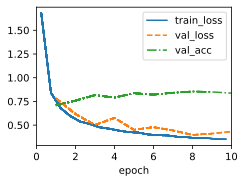

In [308]:
model = my_MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model,data)